In [1]:
import numpy as np
import sympy as sym
import hjson
from pydae.bmapu.bmapu_builder import bmapu
import pydae.build_v2 as db
import pytest
import matplotlib.pyplot as plt

In [4]:
grid = bmapu('milano4ord.hjson')
grid.checker()
grid.uz_jacs = True
grid.construct('temp')

fault_b = sym.Symbol('fault_b_1', real=True)
fault_g = sym.Symbol('fault_g_1', real=True)
fault_g_ref= sym.Symbol('fault_g_ref_1', real=True)
RampDown = sym.Symbol('RampDown_1', real=True)
RampUp = sym.Symbol('RampUp_1', real=True)
K_fault = sym.Symbol('K_fault_1', real=True)

V = sym.Symbol('V_1', real=True)


epsilon_g = fault_g_ref - fault_g
dfault_g_nosat = K_fault*(fault_g_ref - fault_g)
dfault_g_sat = sym.Piecewise((RampDown,dfault_g_nosat<RampDown),
                             (RampUp,dfault_g_nosat>RampUp),
                             (dfault_g_nosat,True))
grid.dae['f'] += [dfault_g_sat]
grid.dae['x'] += [fault_g]

grid.dae['g'][1] += fault_g*V**2
grid.dae['g'][1] += fault_b*V**2

grid.dae['u_ini_dict'].update({f'{fault_b}':0.0})
grid.dae['u_run_dict'].update({f'{fault_b}':0.0})
grid.dae['u_ini_dict'].update({f'{fault_g_ref}':0.0})
grid.dae['u_run_dict'].update({f'{fault_g_ref}':0.0})

grid.dae['params_dict'].update({f'{str(RampDown)}':-20000})
grid.dae['params_dict'].update({f'{str(RampUp)}':10000})
grid.dae['params_dict'].update({f'{str(K_fault)}':10000})


grid.compile()

One generator must have K_delta > 0.0


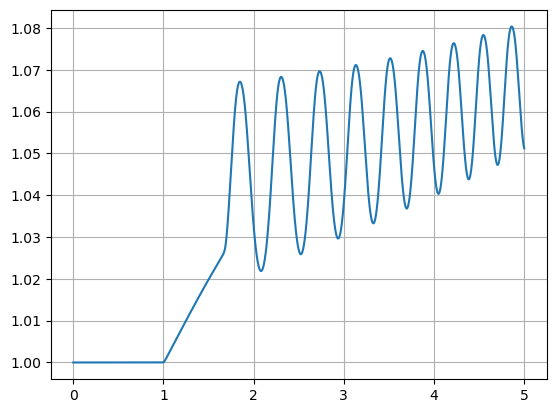

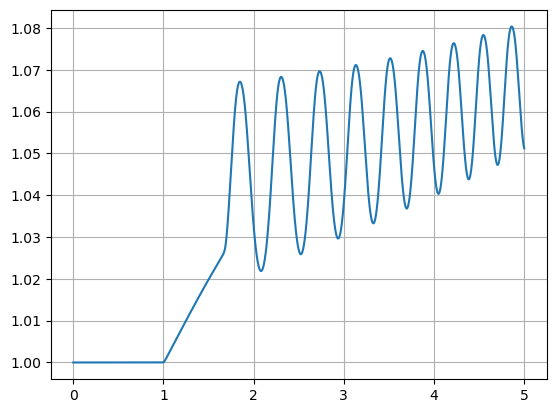

In [26]:

import temp

model = temp.model()
model.Dt = 0.001
model.decimation = 1

v_ref_1 = 1.0
model.ini({'p_m_1':0.5,'v_ref_1':v_ref_1,'K_a_1':200,
           'RampDown_1':-45e3,'RampUp_1':30e3, 'K_fault_1':1e2},'xy_0.json')

# assert model.get_value('V_1') == pytest.approx(v_ref_1, rel=0.001)

model.run(1.0,{})
model.run(1.1,{'fault_g_ref_1':20000})
model.run(1.4,{})
model.run(5,{'fault_g_ref_1':0})

# model.run(1.11,{'fault_g_ref_1':0})
# model.run(2,{'fault_g_ref_1':0})

model.post()
# # assert model.get_value('q_A2') == pytest.approx(-q_ref, rel=0.05)

# model.ini({'p_m_1':0.5,'v_ref_1':1.0},'xy_0.json')
# model.run(1.0,{})
# model.run(15.0,{'v_ref_1':1.05})
# model.post()


fig,axes = plt.subplots()
axes.plot(model.Time,model.get_values('omega_1'))
#axes.plot(model.Time,model.Y)
axes.grid()
fig.savefig('milano4ord_fault.svg')
fig

In [4]:
model.report_x()

delta_1 =  0.61
omega_1 =  0.98
e1q_1 =  0.91
e1d_1 =  0.47
v_r_1 =  0.94
x_cb_1 =  0.16
xi_v_1 = 6131.48
v_f_1 =  0.13
V_dummy_2 =  1.00
xi_freq =  0.00
fault_g_1 =  0.01
